# Import Libraries 📚

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score,confusion_matrix
from imblearn.over_sampling import SMOTE
warnings.filterwarnings('ignore')

# Dataset Information ℹ️


In [90]:
df = pd.read_csv("Lung Cancer Dataset.csv")
df

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,0,1,1,0,0,1,60.700696,1,1,1,1,94.012495,0,1,1,0,YES
4996,80,0,1,1,1,1,1,50.751741,0,1,1,1,94.394968,0,0,0,0,YES
4997,51,1,0,0,1,0,0,61.063496,1,0,0,0,98.108901,0,0,0,1,NO
4998,76,1,0,1,0,0,0,48.662872,0,1,0,1,95.577773,1,0,0,0,NO


# 🔑 Các Đặc Trưng Chính:
Giới tính (GENDER): Giới tính của người tham gia khảo sát (1: Nam, 0: Nữ).

Tuổi (AGE): Tuổi của người tham gia khảo sát.

Hút thuốc (SMOKING): Thói quen hút thuốc (1: Có, 0: Không).

Ngón tay bị đổi màu (FINGER_DISCOLORATION): Biểu hiện ngón tay vàng hoặc đổi màu do hút thuốc nhiều.

Căng thẳng tinh thần (MENTAL_STRESS): Tình trạng bị stress hoặc áp lực tâm lý.

Tiếp xúc với ô nhiễm (EXPOSURE_TO_POLLUTION): Mức độ tiếp xúc với không khí ô nhiễm (1: Có, 0: Không).

Bệnh mãn tính (LONG_TERM_ILLNESS): Có tiền sử mắc bệnh lâu dài (1: Có, 0: Không).

Mức năng lượng (ENERGY_LEVEL): Đánh giá mức năng lượng tổng thể của cơ thể (dưới dạng số thực).

Hệ miễn dịch yếu (IMMUNE_WEAKNESS): Tình trạng miễn dịch yếu (1: Có, 0: Không).

Khó thở (BREATHING_ISSUE): Triệu chứng thở khó, thở ngắn (1: Có, 0: Không).

Sử dụng rượu bia (ALCOHOL_CONSUMPTION): Có uống rượu/bia thường xuyên (1: Có, 0: Không).

Đau họng (THROAT_DISCOMFORT): Có cảm giác đau hoặc khó chịu ở vùng họng (1: Có, 0: Không).

Độ bão hòa oxy (OXYGEN_SATURATION): Nồng độ oxy trong máu (%).

Đau tức ngực (CHEST_TIGHTNESS): Có triệu chứng đau hoặc tức vùng ngực (1: Có, 0: Không).

Tiền sử gia đình (FAMILY_HISTORY): Gia đình có người từng mắc bệnh phổi (1: Có, 0: Không).

Gia đình hút thuốc (SMOKING_FAMILY_HISTORY): Gia đình có người hút thuốc (1: Có, 0: Không).

Suy giảm miễn dịch do stress (STRESS_IMMUNE): Ảnh hưởng tiêu cực của stress đến hệ miễn dịch (1: Có, 0: Không).

# 🎯 Biến Mục Tiêu: Khả năng mắc bệnh phổi (PULMONARY_DISEASE)
YES: Người này có khả năng cao mắc bệnh phổi.

NO: Không có dấu hiệu đáng kể liên quan đến bệnh phổi.

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,5000.0,57.222800,15.799224,30.000000,44.000000,57.000000,71.000000,84.000000
GENDER,5000.0,0.501200,0.500049,0.000000,0.000000,1.000000,1.000000,1.000000
SMOKING,5000.0,0.666400,0.471546,0.000000,0.000000,1.000000,1.000000,1.000000
FINGER_DISCOLORATION,5000.0,0.601200,0.489700,0.000000,0.000000,1.000000,1.000000,1.000000
MENTAL_STRESS,5000.0,0.539800,0.498463,0.000000,0.000000,1.000000,1.000000,1.000000
EXPOSURE_TO_POLLUTION,5000.0,0.516000,0.499794,0.000000,0.000000,1.000000,1.000000,1.000000
LONG_TERM_ILLNESS,5000.0,0.439200,0.496339,0.000000,0.000000,0.000000,1.000000,1.000000
ENERGY_LEVEL,5000.0,55.032043,7.913083,23.258308,49.440685,55.050421,60.323320,83.046971
IMMUNE_WEAKNESS,5000.0,0.394800,0.488857,0.000000,0.000000,0.000000,1.000000,1.000000
BREATHING_ISSUE,5000.0,0.800400,0.399740,0.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [93]:
label_encode = LabelEncoder()
df["PULMONARY_DISEASE"] = label_encode.fit_transform(df["PULMONARY_DISEASE"])

df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1


# Exploratoty Data Analysis (EDA) 📊

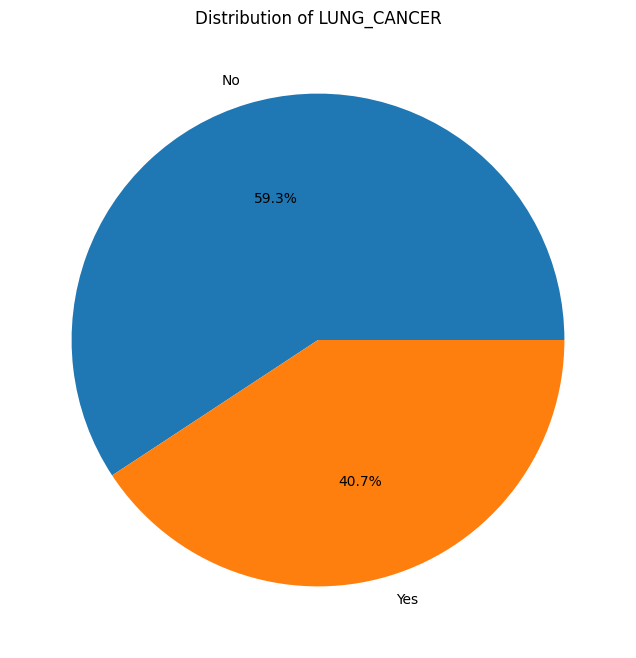

In [94]:
target = df["PULMONARY_DISEASE"].value_counts()
labels = ['No' if i == 0 else 'Yes' for i in target.index]
plt.figure(figsize=(8,8))
plt.pie(target, labels= labels,autopct='%1.1f%%')
plt.title('Distribution of LUNG_CANCER')
plt.show()

<!-- # Training Machine Learning Models 🤖 -->

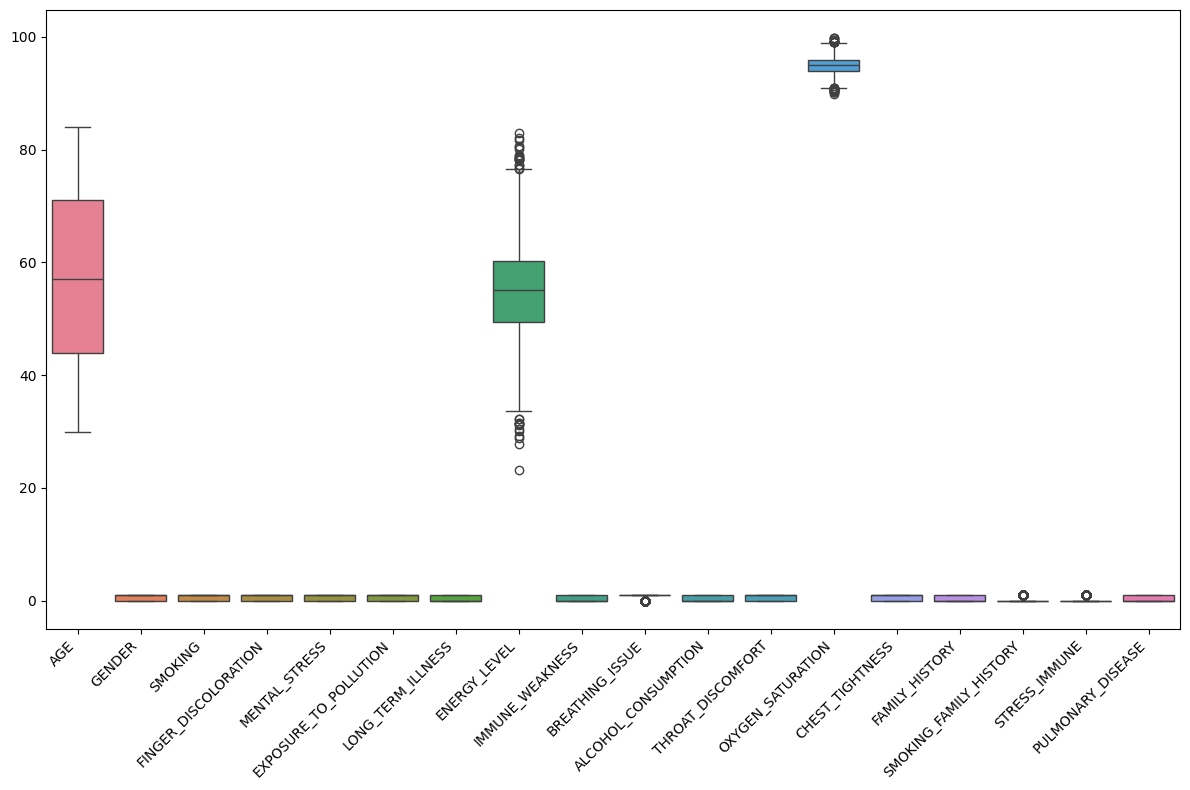

In [95]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

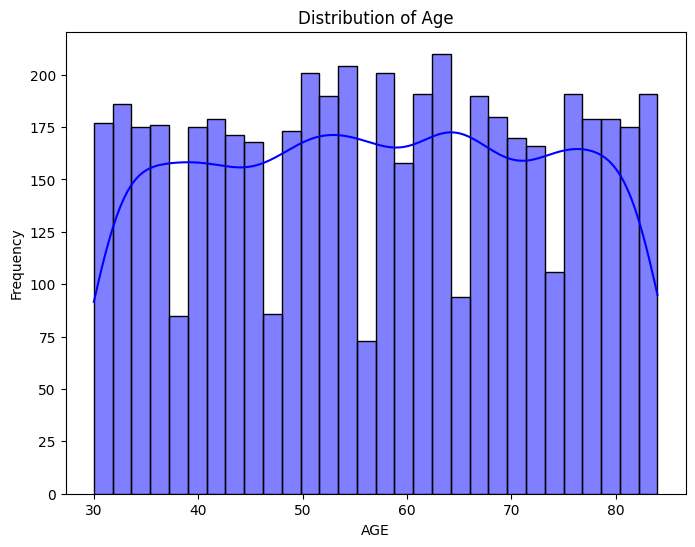

In [96]:
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.ylabel('Frequency')
plt.show()

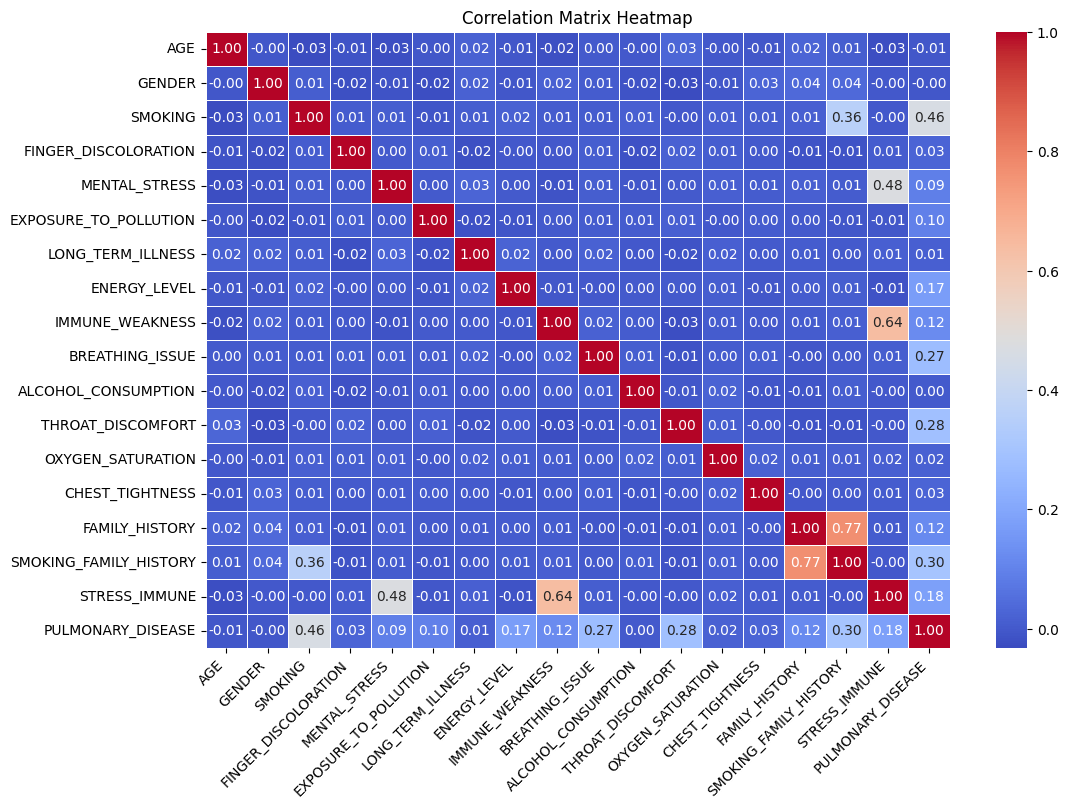

In [97]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.xticks(rotation=45, ha="right")
plt.title('Correlation Matrix Heatmap')
plt.show()

# BaseLine Models 🤖

In [98]:
X = df.drop(columns="PULMONARY_DISEASE")
y = df["PULMONARY_DISEASE"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [99]:
models={
    "DecisionTree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbor": KNeighborsClassifier(),
    "Bayes": GaussianNB(),
    "XBboost": XGBClassifier(),
}

In [100]:
result = []
for name,model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred) * 100
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  print(f"Model: {name} | Accuracy: {accuracy:.2f}% | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")

Model: DecisionTree | Accuracy: 84.70% | Precision: 0.7979 | Recall: 0.7958 | F1-Score: 0.7968
Model: Random Forest | Accuracy: 91.60% | Precision: 0.9014 | Recall: 0.8727 | F1-Score: 0.8868
Model: K-Nearest Neighbor | Accuracy: 64.50% | Precision: 0.5281 | Recall: 0.5491 | F1-Score: 0.5384
Model: Bayes | Accuracy: 86.90% | Precision: 0.8030 | Recall: 0.8647 | F1-Score: 0.8327
Model: XBboost | Accuracy: 90.60% | Precision: 0.8856 | Recall: 0.8621 | F1-Score: 0.8737


Accuracy: 0.917
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       623
           1       0.90      0.88      0.89       377

    accuracy                           0.92      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000



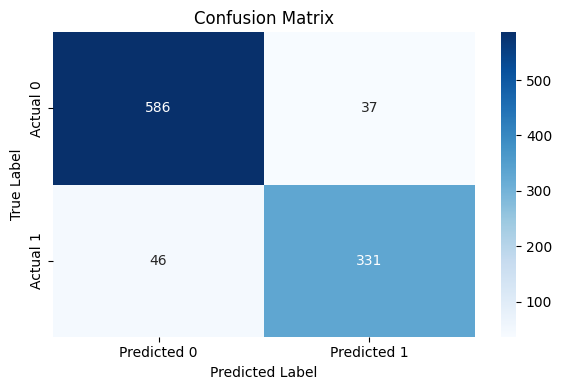

In [101]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Vẽ biểu đồ
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Data Preproccessing 🧹

In [102]:
# Check null data
df.isnull().sum()

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64

In [103]:
# Check duplicated data
df.duplicated().sum()

np.int64(0)

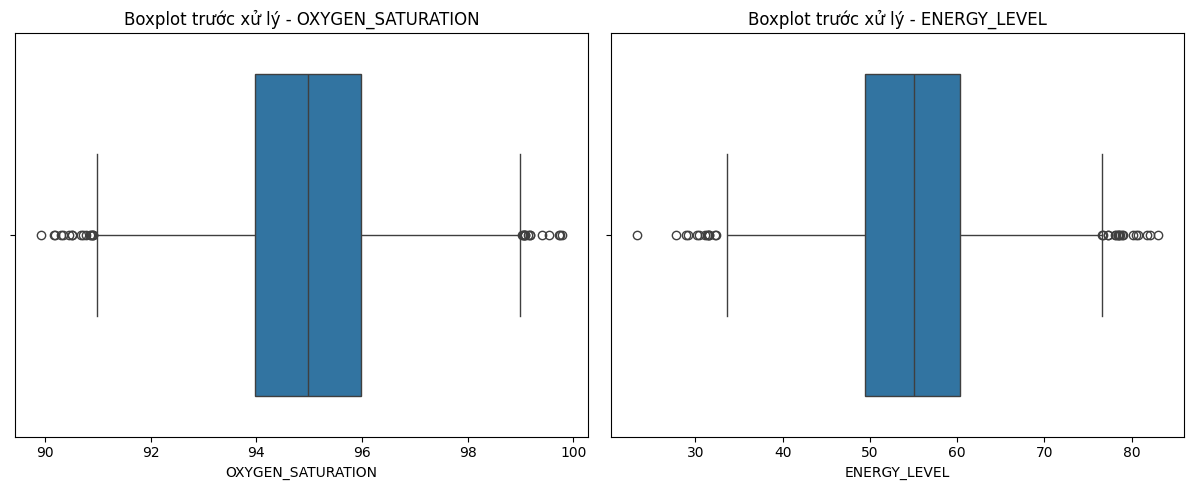

Số lượng bản ghi sau khi loại bỏ ngoại lai: 4939


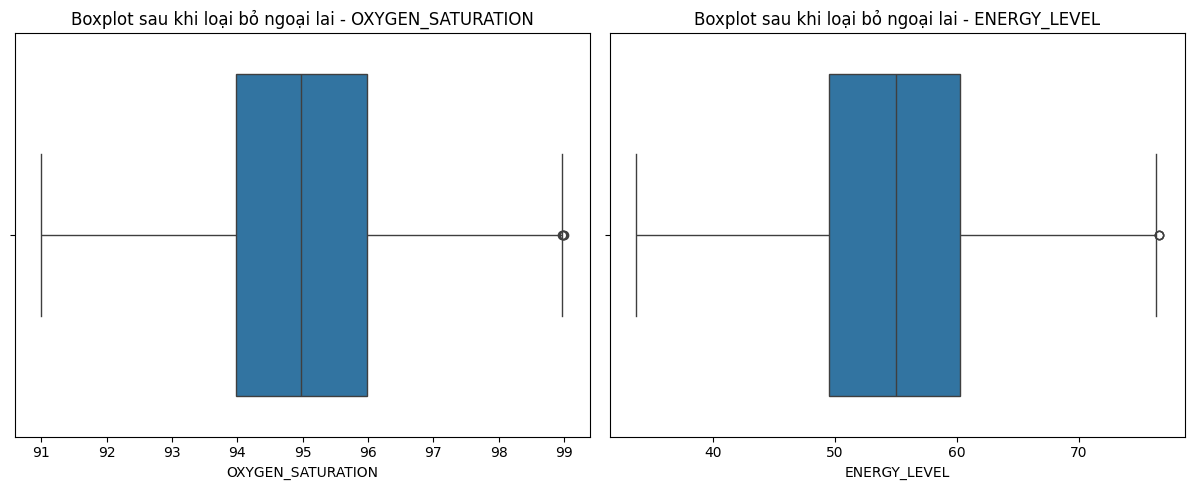

In [104]:
cols = ['OXYGEN_SATURATION', 'ENERGY_LEVEL']

plt.figure(figsize=(18, 5))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot trước xử lý - {col}')
plt.tight_layout()
plt.show()

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"Số lượng bản ghi sau khi loại bỏ ngoại lai: {len(df)}")

# Vẽ boxplot sau loại bỏ ngoại lai - dàn hàng ngang
plt.figure(figsize=(18, 5))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot sau khi loại bỏ ngoại lai - {col}')
plt.tight_layout()
plt.show()


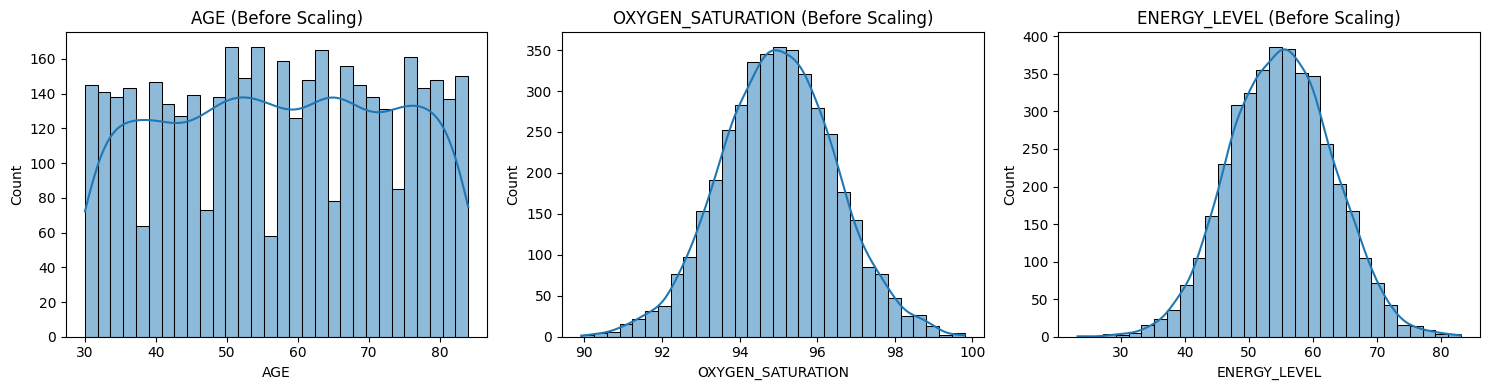

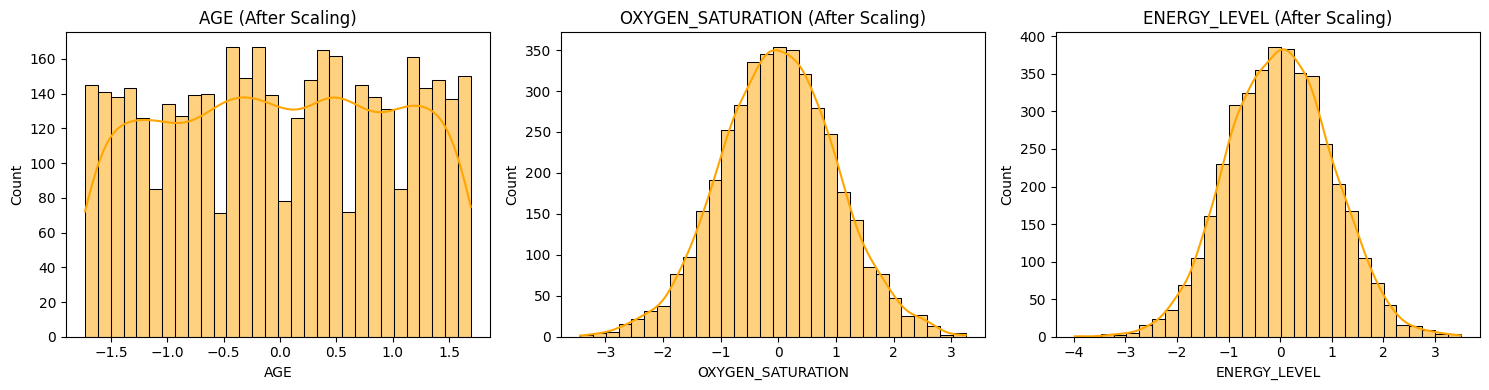

In [105]:
cols = ['AGE', 'OXYGEN_SATURATION', 'ENERGY_LEVEL']

# 1. Vẽ histogram TRƯỚC khi scale (trên X_train)
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(X_train[col], kde=True, bins=30)
    plt.title(f'{col} (Before Scaling)')
plt.tight_layout()
plt.show()

# 2. Scale 3 cột bằng StandardScaler
scaler = StandardScaler()
X_train_scaled_part = scaler.fit_transform(X_train[cols])
X_test_scaled_part = scaler.transform(X_test[cols])

# 3. Tạo bản sao X_train_scaled để giữ lại các cột gốc không bị scale
X_train_scaled = X_train.copy()
X_train_scaled[cols] = X_train_scaled_part

# 4. Vẽ histogram SAU khi scale (trên X_train_scaled)
plt.figure(figsize=(15, 4))
for i, col in enumerate(cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(X_train_scaled[col], kde=True, bins=30, color='orange')
    plt.title(f'{col} (After Scaling)')
plt.tight_layout()
plt.show()

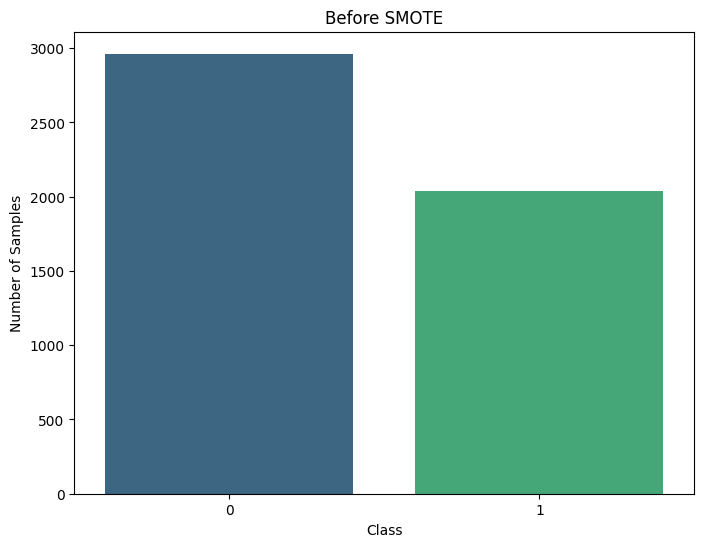

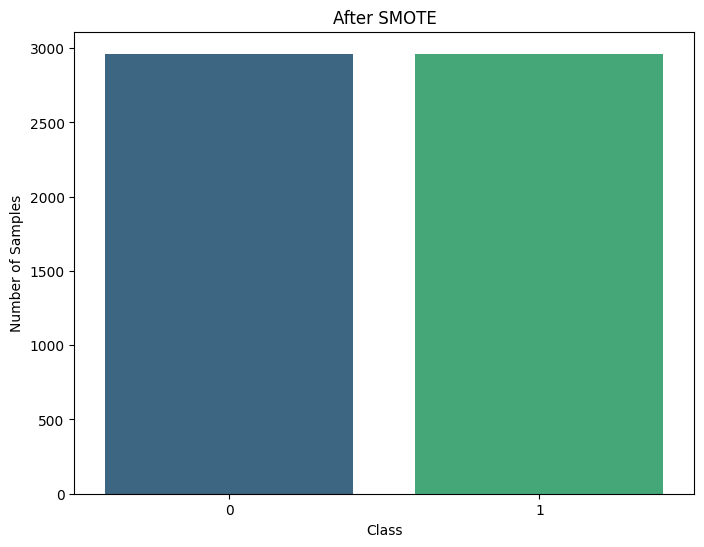

In [108]:
sampler = SMOTE(random_state=10)
X_resampled, y_resampled = sampler.fit_resample(X, y)

# Hàm hiển thị biểu đồ phân phối nhãn
def plot_class_distribution(y_data, title):
    class_distribution = pd.Series(y_data).value_counts()

    plt.figure(figsize=(8, 6))
    sns.barplot(x=class_distribution.index.astype(str),  # để nhãn là chuỗi
                y=class_distribution.values, palette='viridis')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.show()

# Vẽ biểu đồ trước và sau khi cân bằng
plot_class_distribution(y, title='Before SMOTE')
plot_class_distribution(y_resampled, title='After SMOTE')